# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
## Random function rolling a dice n times

def rolling_dice(n): ## n : how many times roll a dice
    time=[]
    face=[]
    for i in range(1,n+1):
        time.append(i)
        face.append(random.choice([1,2,3,4,5,6]))
    d={'Times':time,'Faces':face}
    df=pd.DataFrame(d)
    return df
    
df=rolling_dice(10)
df.index = np.arange(1, len(df) + 1)
df 

,Times,Faces
1,1,3
2,2,2
3,3,1
4,4,5
5,5,3
6,6,3
7,7,3
8,8,2
9,9,4
10,10,3


#### 2.- Plot the results sorted by value.

,Times,Faces
3,3,1
2,2,2
8,8,2
1,1,3
5,5,3
6,6,3
7,7,3
10,10,3
9,9,4
4,4,5


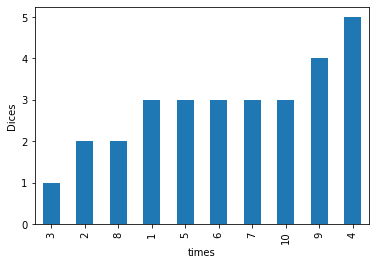

In [3]:
df.sort_values(by='Faces')
df1=df.sort_values(by='Faces')
df1.Faces.plot.bar(xlabel = 'times', ylabel = 'Dices')
df1

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
df2=df[['Faces']].value_counts()
df2

Faces
3        5
2        2
1        1
4        1
5        1
dtype: int64

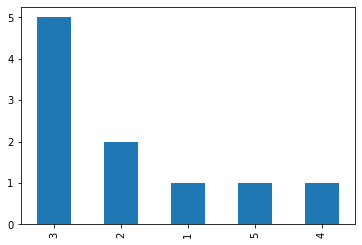

In [5]:
df['Faces'].value_counts().plot.bar();

In [6]:
"""
There is not the relation between this plot and the plot above
"""

'\nThere is not the relation between this plot and the plot above\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def my_mean(df,col):
    column=df.columns
    return df[column[col]].sum()/len(df)
my_mean(df,1)

2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
## calculate the frequency

df2=df[['Faces']].value_counts()
df2 = df2.reset_index()
df2.columns = ['Faces', 'frequency']
df2

,Faces,frequency
0,3,5
1,2,2
2,1,1
3,4,1
4,5,1


In [9]:
##calculate the mean 
mean_dice=np.sum(df2['Faces']*df2['frequency'])/np.sum(df2['frequency'])
print(mean_dice)

2.9


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
def my_median(ls):
    if len(ls)%2==0:
        idx_down=int(len(ls)/2)-1
        idx_up=int(len(ls)/2)
        median=(ls[idx_down]+ls[idx_up])/2.
    else:
        median=ls[len(ls)//2]
    return median

In [11]:
my_list=list(df.sort_values(by='Faces')['Faces'])
my_median(my_list)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [12]:
def four_quartiles(ls):
    q2_id=len(ls)//2
    q2=my_median(ls)
    l1=ls[:q2_id]
    q1=my_median(l1)
    l3=ls[q2_id:]
    q3=my_median(l3)
    q4=max(ls)
    d=[0.25,0.5,0.75,1]
    value=[q1,q2,q3,q4]
    quartiles=pd.DataFrame({'Quartiles':d, 'Value':value})
    return quartiles

In [13]:
four_quartiles(my_list)

,Quartiles,Value
0,0.25,2.0
1,0.50,3.0
2,0.75,3.0
3,1.00,5.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
data=pd.read_csv('roll_the_dice_hundred.csv')
data.rename( columns={'Unnamed: 0':'id'}, inplace=True )
data

,id,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


,id,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


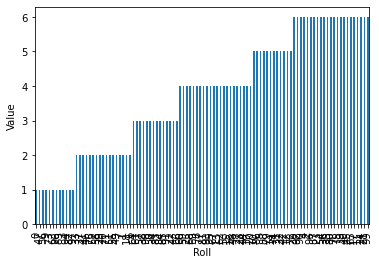

In [15]:
data.sort_values(by='value')
df1=data.sort_values(by='value')
df1.value.plot.bar(xlabel = 'Roll', ylabel = 'Value')
df1

In [16]:
"""
Pretty even distribution amongst potential rolls, 4 and 6 is more common, and 5 is least common 
"""

'\nPretty even distribution amongst potential rolls, 4 and 6 is more common, and 5 is least common \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
my_mean(data,2)

3.74

#### 3.- Now, calculate the frequency distribution.


In [18]:
fre=data['value'].value_counts()
fre = fre.reset_index()
fre.columns = ['value', 'times']
fre.sort_values(by='value', inplace=True)
fre

,value,times
4,1,12
2,2,17
3,3,14
1,4,22
5,5,12
0,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

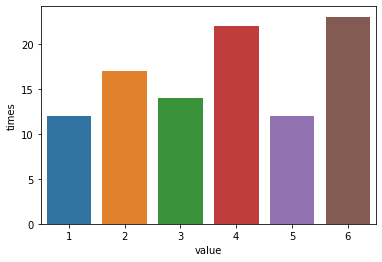

In [19]:
sns.barplot(data=fre, x='value', y='times');

In [20]:
"""
4,6 is more common, and 5,1 is least common
"""

'\n4,6 is more common, and 5,1 is least common\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [21]:
da=pd.read_csv('roll_the_dice_thousand.csv')
da

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [22]:
fred=da['value'].value_counts()
fred = fred.reset_index()
fred.columns = ['value', 'times']
fred.sort_values(by='value', inplace=True)
fred

,value,times
0,1,175
3,2,167
1,3,175
2,4,168
5,5,149
4,6,166


<AxesSubplot:xlabel='value', ylabel='times'>

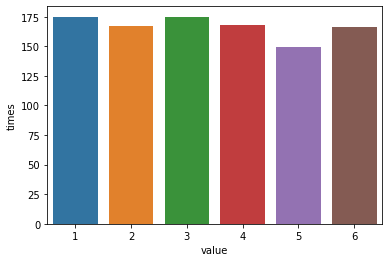

In [23]:
sns.barplot(data=fred, x='value', y='times')

In [24]:
"""
The frequency distribution is the same. It change
"""

'\nThe frequency distribution is the same. It change\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [25]:
df=pd.read_csv('ages_population.csv')
df

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [26]:
frequency=df['observation'].value_counts()
frequency = frequency.reset_index()
frequency.columns = ['observation', 'times']
frequency.sort_values(by='observation', inplace=True)
frequency

,observation,times
57,1.0,2
58,2.0,2
66,4.0,1
60,5.0,2
63,6.0,2
...,...,...
71,69.0,1
69,70.0,1
70,71.0,1
67,73.0,1


<AxesSubplot:xlabel='observation'>

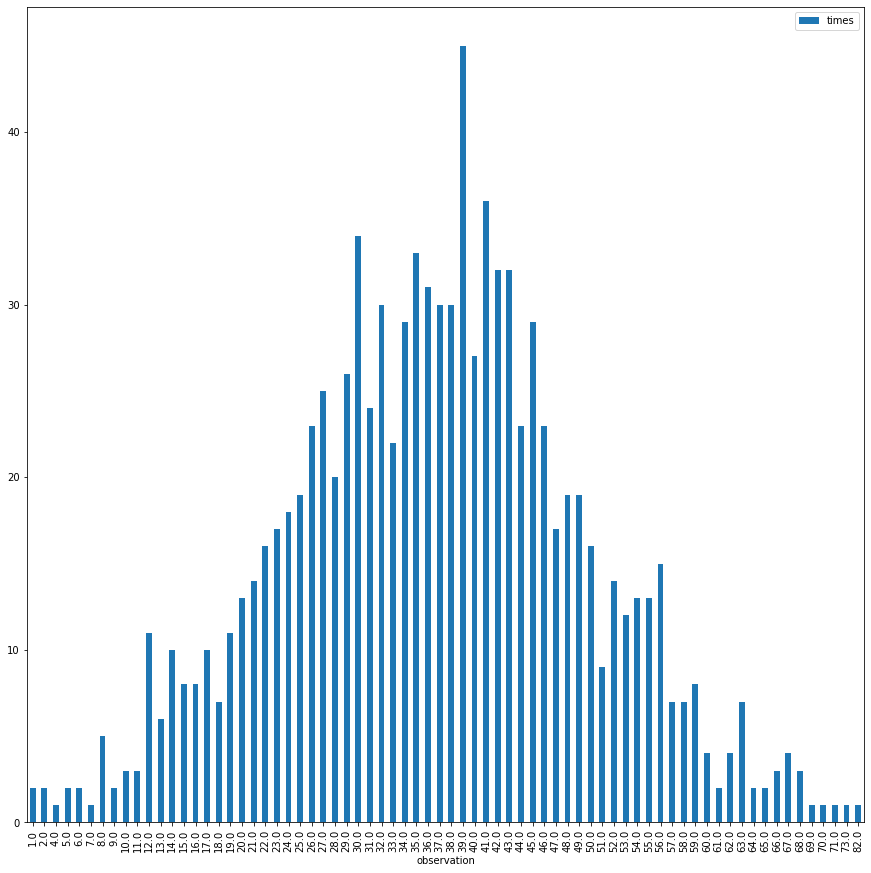

In [27]:
frequency.plot.bar(x='observation',y='times',figsize=(15,15))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [28]:
df.observation.mean()

36.56

In [29]:
df.observation.std()

12.816499625976762

In [30]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

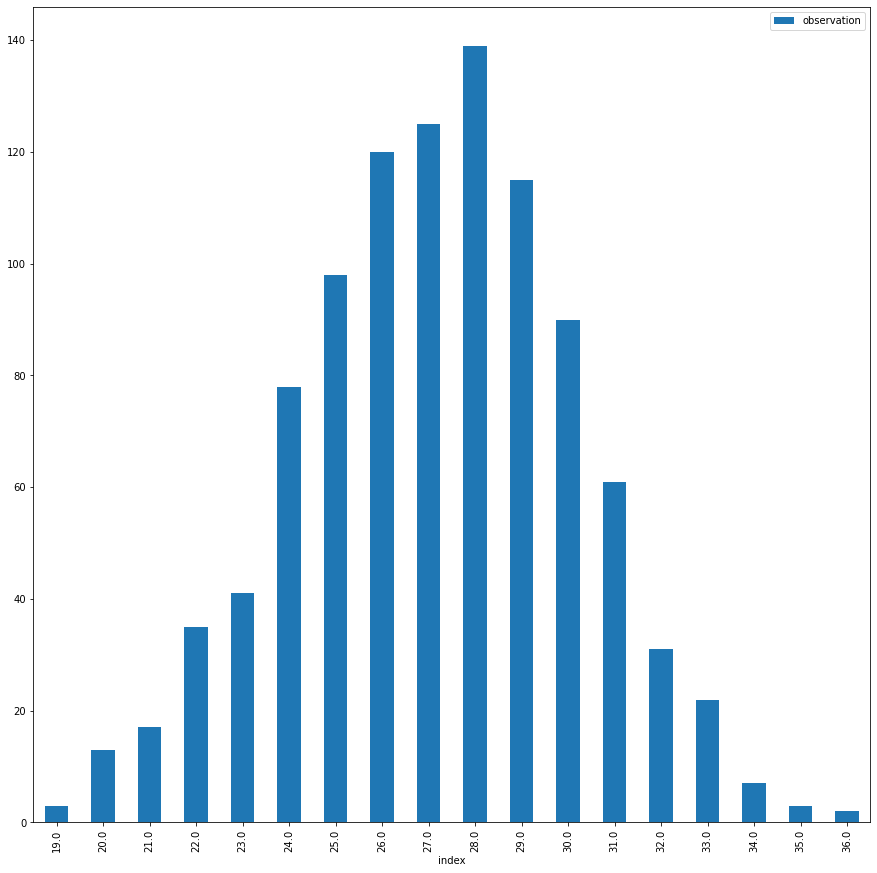

In [31]:
df2=pd.read_csv('ages_population2.csv')
df2['observation'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',figsize=(15,15));

<AxesSubplot:xlabel='observation'>

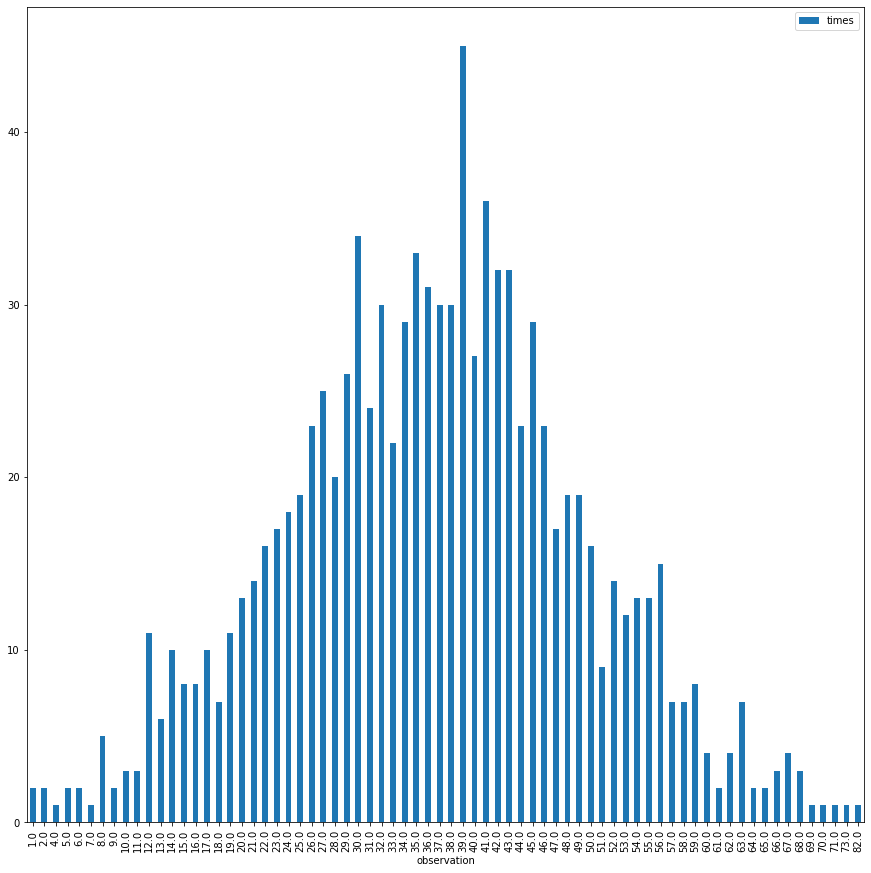

In [32]:
frequency.plot.bar(x='observation',y='times',figsize=(15,15))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [33]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [34]:
df2.observation.mean()

27.155

In [35]:
df2.observation.std()

2.969813932689186

In [36]:
"""
Younger population (lower mean) and smaller std
"""

'\nYounger population (lower mean) and smaller std\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

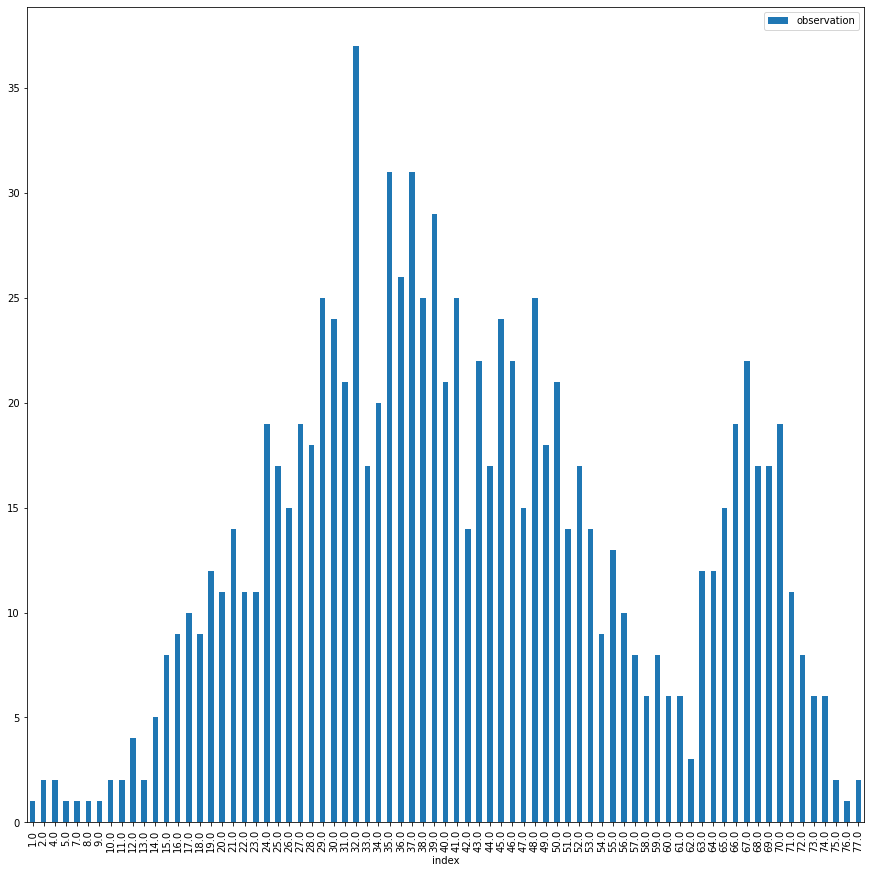

In [37]:
ages3 = pd.read_csv('ages_population3.csv')

ages3['observation'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',figsize=(15,15));

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [38]:
ages3['observation'].mean()

41.989

In [39]:
ages3['observation'].std()

16.144705959865934

In [40]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [41]:
ages3['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [42]:
"""
There is not that big of a difference 
"""

'\nThere is not that big of a difference \n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [45]:
ages3['observation'].quantile([0.1, 0.9])

0.1    22.0
0.9    67.0
Name: observation, dtype: float64

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""